In [17]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 10
#nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 128, 128
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
import scipy.io as sio
import numpy as np
WB=sio.loadmat('sandstone_data.mat')['Data']
Y_data = sio.loadmat('sandstone_data.mat')['L']
Y_data = (Y_data-min(Y_data))/(max(Y_data)-min(Y_data))
X_data = np.reshape(WB,(768,1,img_rows,img_cols))
X_train = X_data[0:720];# X_test=X_data[720:768]
Y_train = Y_data[0:720];# Y_test=Y_data[720:768]
X_val = X_data[720:768]
Y_val = Y_data[720:768]

WB1 = sio.loadmat('test_sandstone_data.mat')['Data']
X_test = np.reshape(WB1, (240, 1, img_rows, img_cols))
Y_test = sio.loadmat('test_sandstone_data.mat')['L']
Y_test = (Y_test-min(Y_test))/(max(Y_test) - min(Y_test))


if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (720, 128, 128, 1)
720 train samples
48 validate samples
240 test samples


In [18]:
# CNN

model = Sequential()

model.add(Convolution2D(24, (6, 6),
                        padding='same',
                        input_shape=input_shape))
# model.add(BatchNormalization)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

model.add(Convolution2D(48, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

# model.add(Convolution2D(128, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
# model.add(Dropout(0.25))
model.add(Dense(50))
model.add(Activation('relu'))
# model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, batch_size=40, epochs=100, verbose=1, validation_data=(X_val, Y_val))

Train on 720 samples, validate on 48 samples
Epoch 1/100
720/720 [==============================] - 6s - loss: 3.2968e-05 - acc: 0.0028 - val_loss: 1.3126e-04 - val_acc: 0.0000e+00

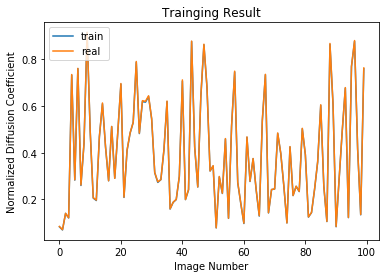

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

x=[]
for i in range(100):
    x.append(i)

pred=model.predict(X_train)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(x,pred[0:100], label='train')
ax.plot(x,Y_train[0:100],label='real')
plt.legend()
ax.set_title('Trainging Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Normalized Diffusion Coefficient')

# plt.savefig('training_result_2.png',dpi=400)

/home/hechaoli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide


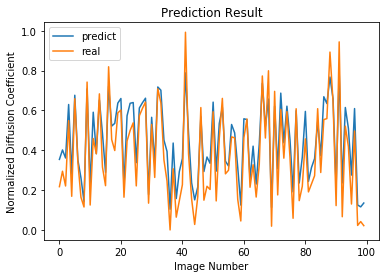

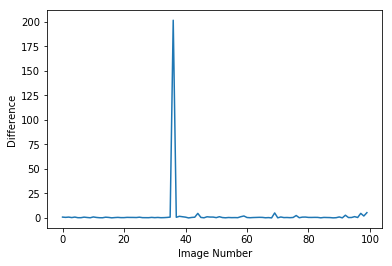

In [29]:
x=[]
for i in range(100):
    x.append(i)

pred=model.predict(X_test)

fig1 = plt.figure()
ax1=fig1.add_subplot(1,1,1)

ax1.plot(x,pred[0:100], label='predict')
ax1.plot(x,Y_test[0:100],label='real')
plt.legend()
ax1.set_title('Prediction Result')
ax1.set_xlabel('Image Number')
ax1.set_ylabel('Normalized Diffusion Coefficient')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
se = np.zeros([240])
for i in range(240):
    se[i] = (pred[i]-Y_test[i])/Y_test[i]
ax2.plot(x,se[0:100])
ax2.set_xlabel('Image Number')
ax2.set_ylabel('Difference')

# plt.savefig('prediction_result_2.png',dpi=400)

In [41]:
count = 0
for i in range(240):
    if np.abs(se[i])>=0.5:
        count += 1
        
count

74

In [26]:
mse = 0

for i in range(240):
    mse += (pred[i] - Y_test[i])**2
    
mse = mse/np.size(pred)
mse

array([ 0.0093072])

In [42]:
threshold = 0.5
def find_image_nb(Input):
    image_nb = []
    for i in range(len(Input)):
        if abs(Input[i]) >= threshold:
            image_nb.append(i)
            
    return image_nb

In [43]:
image_nb = find_image_nb(se)

In [60]:
image_nb[4]

10

In [63]:
diff_test = X_test[image_nb]
sio.savemat('diff_fig.mat',{'Data':diff_test})

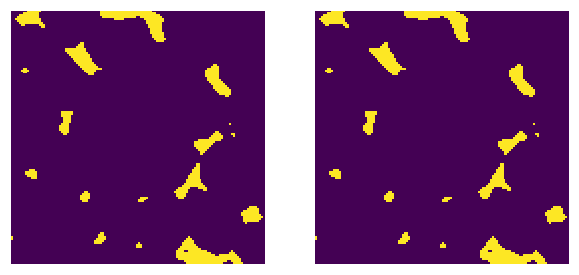

In [64]:
fig = plt.figure(figsize=(10,10))

ax1=fig.add_subplot(1,2,1)
plt.axis('off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
plt.imshow(X_test[10].reshape(128,128))

ax1=fig.add_subplot(1,2,2)
plt.axis('off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
plt.imshow(diff_test[4].reshape(128,128))

In [62]:
diff_test.shape

(74, 128, 128, 1)

In [44]:
np.size(image_nb)

74

In [36]:
import numpy as np
image_nb = np.array(image_nb)
iamge_nb = image_nb.astype('int')
np.savetxt('image_number.txt', image_nb, delimiter = ',')

In [65]:
model.evaluate(X_test, Y_test, batch_size=20)

240/240 [==============================] - 0s     


[0.009307197411544621, 0.008333333457509676]

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 24)      888       
_________________________________________________________________
activation_9 (Activation)    (None, 128, 128, 24)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        6944      
_________________________________________________________________
activation_10 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 48)        13872     
__________

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVR

In [11]:
X_train = X_train.reshape(X_train.shape[0], 16384)
X_test = X_test.reshape(X_test.shape[0], 16384)

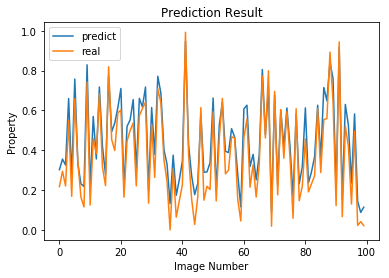

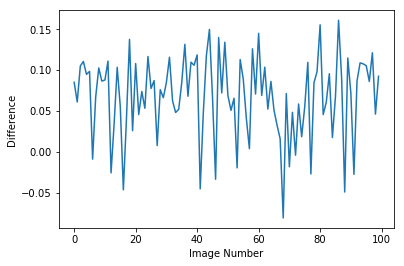

In [12]:
# Linear Regression

lire = LinearRegression()
lire.fit(X_train, Y_train)
pred = lire.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
se = pred-Y_test
ax2.plot(x,se[0:100])
ax2.set_xlabel('Image Number')
ax2.set_ylabel('Difference')

In [13]:
mse = 0

for i in range(240):
    mse += (pred[i] - Y_test[i])**2
    
mse = mse/np.size(pred)
mse

array([ 0.00641214])

/home/hechaoli/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


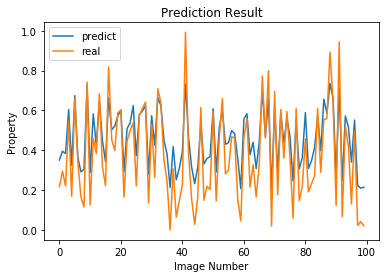

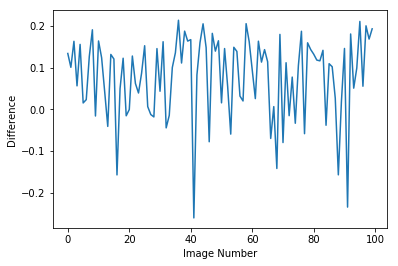

In [14]:
# SVR
svc = SVR()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)

sse = []
for i in range(np.size(pred)):
    diff = pred[i] - Y_test[i]
    sse.append(diff)
    
ax2.plot(x,sse[0:100])
ax2.set_xlabel('Image Number')
ax2.set_ylabel('Difference')

In [15]:
mse = 0

for i in range(240):
    mse += (pred[i] - Y_test[i])**2
    
mse = mse/np.size(pred)
mse

array([ 0.01493991])